# Import des tweets

Cet exercice nécessite d'avoir des clés pour accéder à l'API de Twitter. Il suffit de se créer un compte et de copier-coller ces infos dans le fichier twee_dumper.py du même répertoire que ce classeur.

In [1]:
from tweet_dumper import get_all_tweets

account = "NicolasSarkozy"

tweets = get_all_tweets(account)

getting tweets before 798597342563860479
...400 tweets downloaded so far
getting tweets before 796429834742177791
...600 tweets downloaded so far
getting tweets before 793718295916601343
...800 tweets downloaded so far
getting tweets before 786973241013305343
...1000 tweets downloaded so far
getting tweets before 784459988391628799
...1200 tweets downloaded so far
getting tweets before 779005836614045697
...1400 tweets downloaded so far
getting tweets before 772700031681896447
...1600 tweets downloaded so far
getting tweets before 758220927930728447
...1799 tweets downloaded so far
getting tweets before 745266466694430719
...1999 tweets downloaded so far
getting tweets before 735539247592148992
...2199 tweets downloaded so far
getting tweets before 715071731631841279
...2399 tweets downloaded so far
getting tweets before 695365638370381827
...2599 tweets downloaded so far
getting tweets before 671998194398662656
...2799 tweets downloaded so far
getting tweets before 663006470179561474


Regardons ce que l'on récupère.

In [2]:
type(tweets)

list

Il s'agit d'une liste (sans doute une liste de tweets). Regardons le premier élément.

In [3]:
tweets[1]

['869259637136162817',
 datetime.datetime(2017, 5, 29, 18, 30, 22),
 'RT @ProjetAladin: @NicolasSarkozy: "Je suis venu célébrer les 10ans du @ProjetAladin dont je partage les principes" contre l\'#extremisme &amp;…']

Effectivement, nous avons affaire à une liste de liste. Pour chaque tweet, nous avons un ID, une date/heure et le message lui-même.

Chargeons cela dans le format de données adapté : comme souvent c'est un DataFrame.

In [4]:
import pandas as pd
import numpy as np
import datetime as dt

df = pd.DataFrame(tweets, columns=['id', 'date', 'text'])

df.head()

,id,date,text
0,870594068405006336,2017-06-02 10:52:55,Bravo à @Thom_astro qui nous a montré la Terre...
1,869259637136162817,2017-05-29 18:30:22,"RT @ProjetAladin: @NicolasSarkozy: ""Je suis ve..."
2,868555879297277952,2017-05-27 19:53:53,"Honte à ceux qui, en profanant la tombe du Gén..."
3,868120888343920640,2017-05-26 15:05:23,Merci à @francoisbaroin pour ce beau moment pa...
4,867846156440801281,2017-05-25 20:53:42,RT @VeroniqueWache: Victoire ! 2-1 #aufinish h...


C'est déjà plus propre !

## Nombre moyen de tweets par jour

Nous nous créons une fonction qui analyse le fil Twitter que nous venons de récupérer. Combien de tweets chaque jour ? Dont combien de RT ?

In [5]:
def analyse_fil(df):
    nb_tweets_par_jour = df.shape[0] / (df['date'].max() - df['date'].min()).days
    print(str(nb_tweets_par_jour) + ' tweets par jour.')
    
    condition = df['text'].str.contains('RT ')
    dft = df[condition]
    
    print(str(100 * dft.shape[0] / df.shape[0]) + '% de RT.')
    
    return 

In [6]:
analyse_fil(df)

4.57 tweets par jour.
26.695842450765863% de RT.


## Taux de vocabulaire

Comme nous avons tant de messages à notre disposition, nous pouvons évaluer le nombre de mots différents employés par le tweetos en question.

Pour cela, nous devons enlever tous les caractères spéciaux, ainsi que les mots courts (tels que "et", "de", "le", etc.).

In [7]:
def myparse(cell):
    # On vire les ponctuations
    liste_ponctuation = [':', ';', ',', '.', '?', '!', '(', ')']
    for elem in liste_ponctuation:
        cell = cell.replace(elem, '')
    
    cell = cell.replace('  ', ' ')
    
    # On vire les #, les @ et les /
    mylist = cell.split(' ')
    mylist = [elem.lower() for elem in mylist if "#" not in elem and "@" not in elem and "/" not in elem]
    
    return mylist

# On applique notre fonction de parse
df['split'] = df['text'].apply(myparse)

# On construit un dictionnaire mots --> occurences
mondict = {}
for cell in df[np.logical_not(df['text'].str.contains('RT '))]['split']:
    for word in cell:
        if word in mondict:
            mondict[word] += 1
        else:
            mondict[word] = 1

# On le transforme en DataFrame
df_mots = pd.DataFrame.from_dict(mondict, orient = 'index')
df_mots.columns = ['Occurences']
df_mots = df_mots.sort_values('Occurences', ascending = False)

# On filtre sur les mots de plus de "tant" de caractères
df_mots[df_mots.index.str.len() > 3].shape[0]

5046

## Allons plus loin sur les dates

Nous n'avons pas besoin de l'ID du tweet ; jetons-le. En revanche, nous allons indexer notre DataFrame par la date de publication. Cela facilitera les manipulations.

In [8]:
df = df.drop('id', axis='columns')
df = df.set_index('date')

df.info()

df.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3199 entries, 2017-06-02 10:52:55 to 2015-07-02 17:57:54
Data columns (total 2 columns):
text     3199 non-null object
split    3199 non-null object
dtypes: object(2)
memory usage: 75.0+ KB


,text,split
date,,
2017-06-02 10:52:55,Bravo à @Thom_astro qui nous a montré la Terre...,"[bravo, à, qui, nous, a, montré, la, terre, co..."
2017-05-29 18:30:22,"RT @ProjetAladin: @NicolasSarkozy: ""Je suis ve...","[rt, ""je, suis, venu, célébrer, les, 10ans, du..."
2017-05-27 19:53:53,"Honte à ceux qui, en profanant la tombe du Gén...","[honte, à, ceux, qui, en, profanant, la, tombe..."
2017-05-26 15:05:23,Merci à @francoisbaroin pour ce beau moment pa...,"[merci, à, pour, ce, beau, moment, passé, hier..."
2017-05-25 20:53:42,RT @VeroniqueWache: Victoire ! 2-1 #aufinish h...,"[rt, victoire, 2-1]"


Maintenant, pour accéder aux tweets de 2016, il suffit de taper :

In [9]:
df['2016'].head()

,text,split
date,,
2016-11-27 19:45:47,Retrouvez ma déclaration suite à la victoire d...,"[retrouvez, ma, déclaration, suite, à, la, vic..."
2016-11-20 21:32:23,Je souhaite le meilleur pour mon pays et pour ...,"[je, souhaite, le, meilleur, pour, mon, pays, ..."
2016-11-18 21:24:55,La France mérite qu'on lui donne tout. Merci d...,"[la, france, mérite, qu'on, lui, donne, tout, ..."
2016-11-18 20:40:04,Le bonheur de la vie est dans les épreuves sur...,"[le, bonheur, de, la, vie, est, dans, les, épr..."
2016-11-18 18:57:18,La victoire est belle parce qu'elle est diffic...,"[la, victoire, est, belle, parce, qu'elle, est..."


Pour afficher le nombre de tweets par jour, nous utiliserons la fonction resample(), qui permet d'aggréger des séries temporelles par jour, semaine, etc.

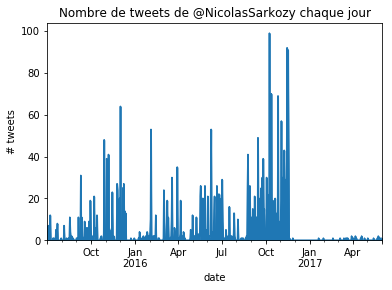

In [15]:
import matplotlib.pyplot as plt

df.resample('D').count()['text'].plot(kind='area')
#df.resample('D').count()['text'].rolling(window=30).mean().plot(kind='line')

plt.title("Nombre de tweets de @" + account + " chaque jour")
plt.ylabel("# tweets")

plt.show()

Si on veut le même indicateur, fonction du jour de la semaine, c'est un peu plus compliqué. Nous utiliserons un groupby() (comme en SQL).

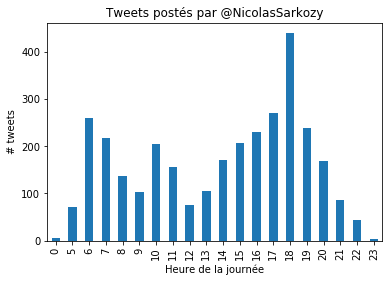

In [16]:
df['HOD'] = df.index.hour

df.groupby(by='HOD')['text'].count().plot(kind='bar')

plt.title("Tweets postés par @" + account)
plt.ylabel('# tweets')
plt.xlabel("Heure de la journée")
plt.show()